100


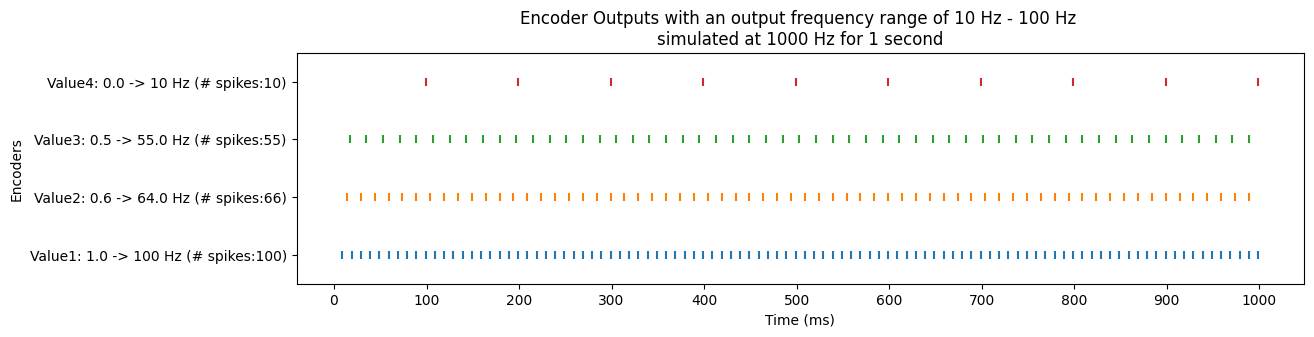

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe import Encoder

# this function takes 4 encoders, simulates them for some time, and plots the results (output spikes)
def simulate_and_plot_enc(e1,e2,e3,e4):

    # simulate for one second and store the fires (encoder outputs)
    fires1 = []
    fires2 = []
    fires3 = []
    fires4 = []
    for t in range(sim_f):
        if e1.update():
            fires1.append(t)

        if e2.update():
            fires2.append(t)

        if e3.update():
            fires3.append(t)

        if e4.update():
            fires4.append(t)

    fig = plt.subplots(figsize=(13,3))
    plt.title(f'Encoder Outputs with an output frequency range of {min_f} Hz - {max_f} Hz \nsimulated at {sim_f} Hz for 1 second')
    e_labels=[
            f'Value1: {value1} -> {e1.value_f} Hz (# spikes:{len(fires1)})',\
            f'Value2: {value2} -> {e2.value_f} Hz (# spikes:{len(fires2)})',\
            f'Value3: {value3} -> {e3.value_f} Hz (# spikes:{len(fires3)})',\
            f'Value4: {value4} -> {e4.value_f} Hz (# spikes:{len(fires4)})']
    plt.yticks(ticks=[1, 2, 3, 4], labels=e_labels)
    plt.ylabel('Encoders')
    plt.ylim(0.5, 4.5)
    plt.xlabel('Time (ms)')

    plt.xticks(ticks=range(0, sim_f + 1, 100))

    plt.scatter(fires1, np.ones(len(fires1)) * 1, marker='|')
    plt.scatter(fires2, np.ones(len(fires2)) * 2, marker='|')
    plt.scatter(fires3, np.ones(len(fires3)) * 3, marker='|')
    plt.scatter(fires4, np.ones(len(fires4)) * 4, marker='|')
    # plt.savefig('../Images/Example_enc.pdf')
    plt.show()


# input values for the encoders
value1 = 1.0
value2 = 0.6
value3 = 0.5
value4 = 0.0

# min and max output freq of the encoders
min_f = 10
max_f = 100

# update rate of the simulation (how often do we check to see if the encoder has a spike or not)
sim_f = 1000

# lets test 4 encoders
e1 = Encoder(min_f, max_f, sim_f) 
e2 = Encoder(min_f, max_f, sim_f, enc_type='frequency')
e3 = Encoder(min_f, max_f, sim_f, enc_type='frequency')
e4 = Encoder(min_f, max_f, sim_f)

e1.set_value(value1)
e2.set_value(value2)
e3.set_value(value3)
e4.set_value(value4)

print(e4.fire_period)

simulate_and_plot_enc(e1, e2, e3, e4)

## Period vs. Frequency encoding

The default rate encoder type is period. Theory and examples for this can be seen below

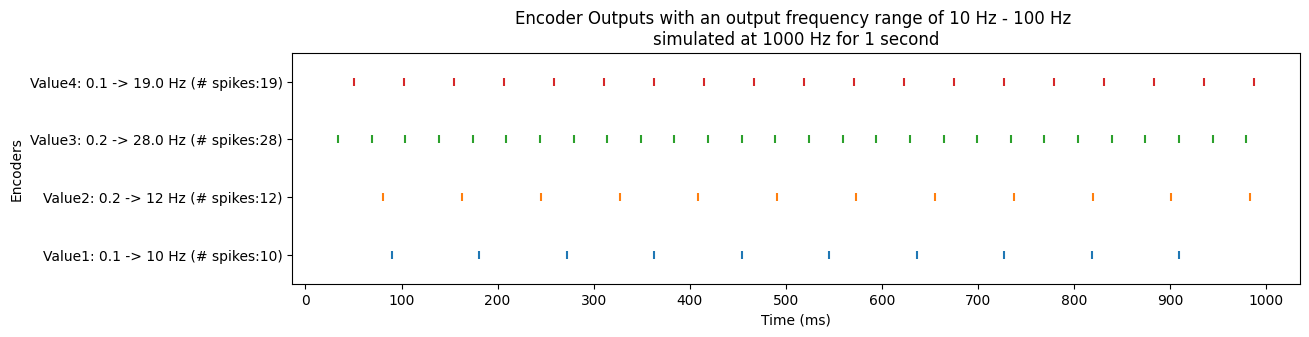

In [2]:
# If we do the same example above, but use values 

# input values for the encoders
value1 = 0.1
value2 = 0.2
value3 = 0.2
value4 = 0.1

# min and max output freq of the encoders
min_f = 10
max_f = 100

# update rate of the simulation (how often do we check to see if the encoder has a spike or not)
sim_f = 1000

# lets test 3 encoders
e1 = Encoder(min_f, max_f, sim_f, enc_type='period') 
e2 = Encoder(min_f, max_f, sim_f, enc_type='period')
e3 = Encoder(min_f, max_f, sim_f, enc_type='frequency')
e4 = Encoder(min_f, max_f, sim_f, enc_type='frequency')

e1.set_value(value1)
e2.set_value(value2)
e3.set_value(value3)
e4.set_value(value4)

simulate_and_plot_enc(e1, e2, e3, e4)

100.0
32.0


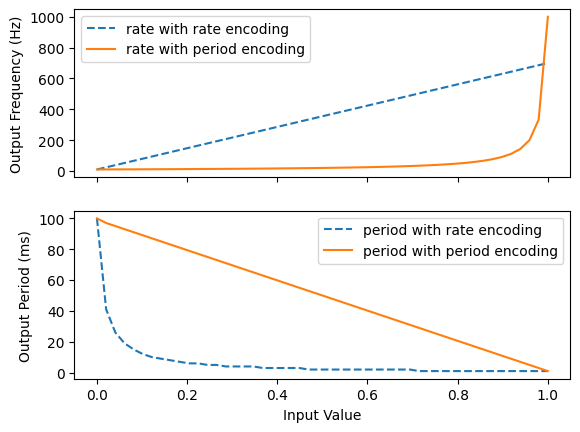

In [3]:
# Time (1 second)
x = np.linspace(0, 1)

# min and max output freq of the encoders
min_f = 10
max_f = 700

# update rate of the simulation (how often do we check to see if the encoder has a spike or not)
sim_f = 1000

y = ((max_f - min_f) * x) + min_f

fig, ax = plt.subplots(2,1, sharex=True)

# max_period = min(sim_f/min_f, max_f)
# min_period = max(sim_f/min_f, min_f)

y_scaled = -(((sim_f/min_f - sim_f/max_f) * x) + sim_f/max_f) + (sim_f/min_f + sim_f/max_f)
y_scaled = np.asarray(y_scaled, np.int32)
period = np.asarray(sim_f / y,  np.int32)
period_corrected = np.asarray(np.linspace(sim_f/min_f, sim_f/max_f),  np.int32)
period_enc_freq = sim_f / y_scaled
actual_freq = sim_f / period
# plt.plot(x, -1/np.log(x)/50)
ax[0].plot(x, y, label='rate with rate encoding', linestyle='dashed')
ax[1].plot(x, period, label='period with rate encoding', linestyle='dashed')
# plt.plot(x, period_corrected, label = 'period corrected')
ax[1].plot(x, y_scaled, label = 'period with period encoding')
# ax[0].plot(x, actual_freq, label = 'actual rate encoded', linestyle='dashed')


ax[0].plot(x, period_enc_freq, label = 'rate with period encoding')

# plt.ylim(0, 300*1.1)
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel('Input Value')
ax[0].set_ylabel('Output Frequency (Hz)')
ax[1].set_ylabel('Output Period (ms)')

print((len(np.unique(y_scaled))/len(y_scaled)) * 100)
# print(period_corrected == y_scaled)

print((len(np.unique(actual_freq))/len(actual_freq)) * 100)